<h4 style="margin: 30px;">бизнес-цели и 2 задачи, которые нужно решить:<br/>
Снижение вероятности инсульта у пациентов с высоким риском путем раннего выявления предрасположенности.<br/>
Оптимизация медицинских услуг, предоставляемых пациентам, с учетом их риска инсульта.<br/><br/><br/>
Разработать модель, которая прогнозирует вероятность инсульта у пациента.<br/>
Определить значимые признаки для анализа риска инсульта, чтобы направить усилия медицинских работников на важные факторы.</h4>

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('./csv/option4.csv')

# Обзор данных
print("Количество колонок:", data.columns.size)
print("Колонки:", data.columns)

Количество колонок: 12
Колонки: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [165]:
print("\nНаличие пропущенных значений:")
print(data.isnull().sum())

print("\n\n")

print(data.describe)


Наличие пропущенных значений:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0            

<p style="margin: 30px;">Возьмем и заменим нулевые значения в столбце bmi на средние значения по столбцу </p>

In [166]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
print("\nНаличие пропущенных значений:")
print(data.isnull().sum())


Наличие пропущенных значений:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<p style="margin: 30px;">Взглянем на выбросы: </p>

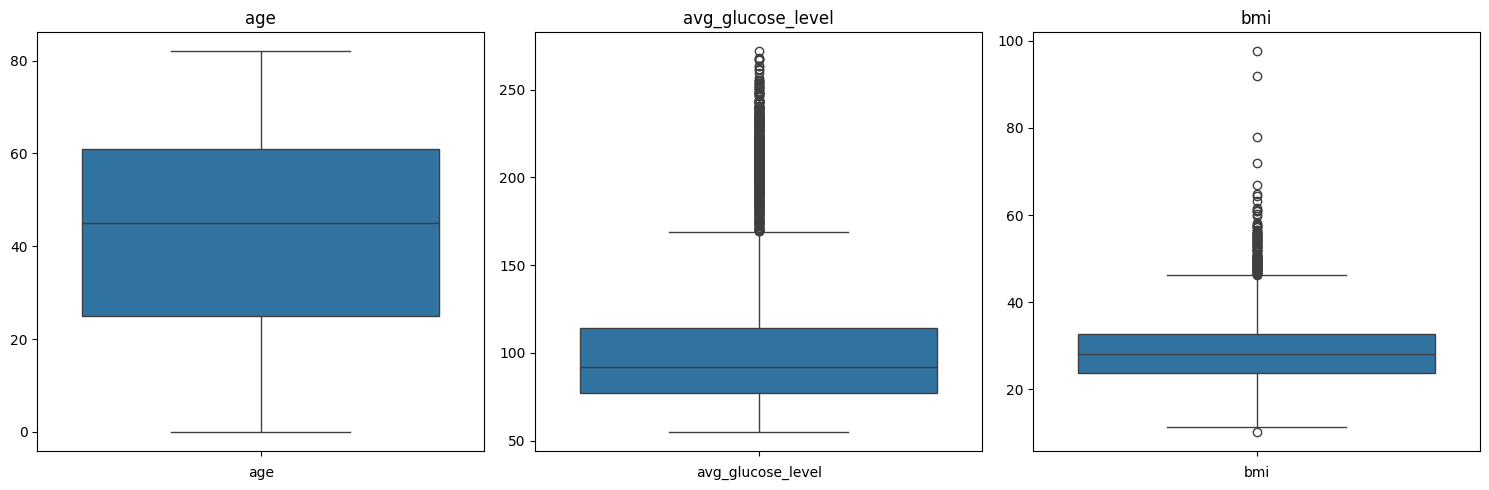

In [168]:
def plot_numeric_boxplots(dataframe):
    # Фильтрация числовых столбцов
    numeric_columns = ['age', 'avg_glucose_level', 'bmi']
    
    # Построение графиков
    if numeric_columns:
        plt.figure(figsize=(15, 5))
        
        for i, col in enumerate(numeric_columns):
            if col != 'id':
                  plt.subplot(1, len(numeric_columns), i + 1)
                  sns.boxplot(y=dataframe[col])
                  plt.title(f'{col}')
                  plt.ylabel('')
                  plt.xlabel(col)
                          
        plt.tight_layout()
        plt.show()
    else:
        print("Нет подходящих числовых столбцов для построения графиков.")

plot_numeric_boxplots(data)

<p style="margin: 30px;">Видим выбросы в столбцах со средним уровнем глюкозы и в столбце bmi (индекс массы тела). устраним выбросы - поставим верхние и нижние границы</p>

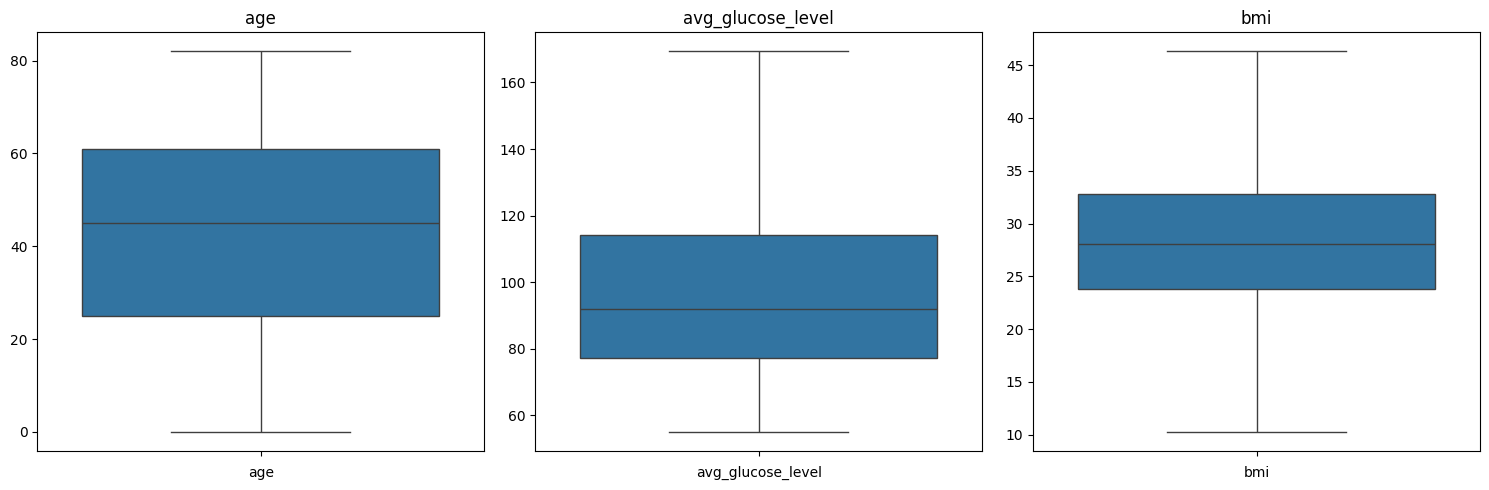

In [170]:
def remove_outliers(df):

    numeric_columns = ['age', 'avg_glucose_level', 'bmi']
    for column in numeric_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df
    
data = remove_outliers(data)
plot_numeric_boxplots(data)

<p style="margin: 30px;">Так, от выбросов избавились, теперь разобьем на выборки</p>

In [171]:
from sklearn.model_selection import train_test_split

# Определение признаков и целевой переменной
X = data.drop(columns=['id', 'stroke'])  
y = data['stroke']  

# Обучающая выборка
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Тестовая и контрольная выборки
X_test, X_control, y_test, y_control = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Контрольная выборка: {X_control.shape}")


Размеры выборок:
Обучающая выборка: (4088, 10)
Тестовая выборка: (511, 10)
Контрольная выборка: (511, 10)


stroke
0    4861
1     249
Name: count, dtype: int64


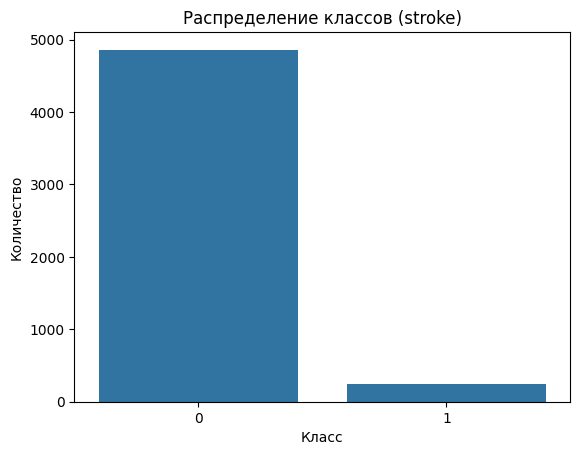

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет количества объектов каждого класса
class_counts = y.value_counts()
print(class_counts)

# Визуализация
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Распределение классов (stroke)")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()


<p style="margin: 30px;">Напишем функцию и сделаем аугментацию данных</p>

Данные ДО аугментации в ОБУЧАЮЩЕЙ ВЫБОРКЕ  (60-80% данных)

stroke
0    3889
1     199
Name: count, dtype: int64

После оверсемплинга

stroke
0    3889
1    1944
Name: count, dtype: int64

После балансировки данных (андерсемплинга)

stroke
0    1944
1    1944
Name: count, dtype: int64


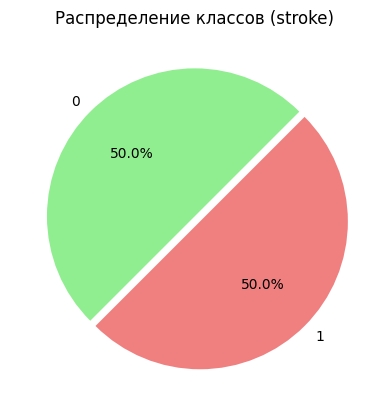

Данные ДО аугментации в ТЕСТОВОЙ ВЫБОРКЕ  (10-20% данных)

stroke
0    486
1     25
Name: count, dtype: int64

После оверсемплинга

stroke
0    486
1    243
Name: count, dtype: int64

После балансировки данных (андерсемплинга)

stroke
0    243
1    243
Name: count, dtype: int64


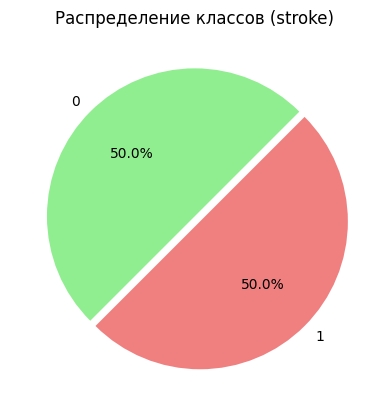

In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def over_under_sampling(x_selection, y_selection):

    # сначала увеличение меньшинства

    oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42) 
    x_over, y_over = oversampler.fit_resample(x_selection, y_selection) 

    print("\nПосле оверсемплинга\n")
    print(y_over.value_counts())

    # потом уменьшение большинства

    undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
    x_balanced, y_balanced = undersampler.fit_resample(x_over, y_over)

    print("\nПосле балансировки данных (андерсемплинга)\n")
    print(y_balanced.value_counts())

    plt.pie(
    y_balanced.value_counts(), 
    labels=class_counts.index,  # Метки классов (0 и 1)
    autopct='%1.1f%%',  # Отображение процентов
    colors=['lightgreen', 'lightcoral'],  # Цвета для классов
    startangle=45,  # Поворот диаграммы
    explode=(0, 0.05)  # Небольшое смещение для класса 1
    )
    plt.title("Распределение классов (stroke)")
    plt.show()

print("Данные ДО аугментации в ОБУЧАЮЩЕЙ ВЫБОРКЕ  (60-80% данных)\n")
print(y_train.value_counts())
over_under_sampling(X_train, y_train)

print("Данные ДО аугментации в ТЕСТОВОЙ ВЫБОРКЕ  (10-20% данных)\n")
print(y_test.value_counts())
over_under_sampling(X_test, y_test)

<p style="margin: 30px;">Теперь можно и к конструированию признаков приступить) данные ведь сбалансированы (в выборках)</p>

<p style="margin: 30px;">Унитарное кодирование категориальных признаков <br/> <br/>Применяем к категориальным (НЕ числовым) признакам: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'</p>

In [ ]:
# One-Hot Encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

print("Данные после унитарного кодирования:")
X_encoded.head()


Данные после унитарного кодирования:


age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
845   48.0             0              0              69.21  33.1        False   
3744  15.0             0              0             122.25  21.0         True   
4183  67.0             0              0             110.42  24.9        False   
3409  44.0             0              0              65.41  24.8         True   
284   14.0             0              0              82.34  31.6         True   

      gender_Other  ever_married_Yes  work_type_Never_worked  \
845          False              True                   False   
3744         False             False                   False   
4183         False              True                   False   
3409         False              True                   False   
284          False             False                   False   

      work_type_Private  work_type_Self-employed  work_type_children  \
845                True                    False               False   
3744               True                    False               False   
4183              False                     True               False   
3409               True                    False               False   
284               False                    False               False   

      Residence_type_Urban  smoking_status_formerly smoked  \
845                   True                           False   
3744                 False                           False   
4183                 False                           False   
3409                  True                           False   
284                   True                           False   

      smoking_status_never smoked  smoking_status_smokes  
845                          True                  False  
3744                         True                  False  
4183                         True                  False  
3409                        False                   True  
284                         False                  False

<p style="margin: 30px;">Дискретизация числовых признаков<br/><br/>Числовые признаки, такие как 'age', 'avg_glucose_level', 'bmi', можно разделить на категории (биннинг).</p>


In [ ]:
X_encoded['age_bins'] = pd.cut(X_encoded['age'], bins=[0, 18, 30, 50, 80], labels=['ребенок', 'молодой', 'средний', 'пожилой'])
X_encoded['bmi_bins'] = pd.cut(X_encoded['bmi'], bins=[0, 18.5, 25, 30, 50], labels=['низкий', 'норма', 'избыток', 'ожирение'])

print("Данные после дискретизации:")
X_encoded[['age_bins', 'bmi_bins']].head(10)


Данные после дискретизации:


age_bins  bmi_bins
845   средний  ожирение
3744  ребенок     норма
4183  пожилой     норма
3409  средний     норма
284   ребенок  ожирение
4796  пожилой  ожирение
1283  пожилой  ожирение
3656  средний  ожирение
2485  ребенок     норма
1282  пожилой  ожирение

<p style="margin: 30px;">Ручной синтез новых признаков <br/><br/>
<li>Возрастной индекс глюкозы: age * avg_glucose_level
<li>Индекс массы тела с поправкой на глюкозу: bmi / avg_glucose_level </p>


In [ ]:
X_encoded['age_glucose_index'] = X_encoded['age'] * X_encoded['avg_glucose_level']
X_encoded['bmi_glucose_ratio'] = X_encoded['bmi'] / X_encoded['avg_glucose_level']

print("Данные после синтеза новых признаков:")
X_encoded[['age_glucose_index', 'bmi_glucose_ratio']].head(10)

Данные после синтеза новых признаков:


age_glucose_index  bmi_glucose_ratio
845           3322.0800           0.478255
3744          1833.7500           0.171779
4183          7398.1400           0.225503
3409          2878.0400           0.379147
284           1152.7600           0.383775
4796          5204.1700           0.528826
1283          9478.3500           0.295779
3656          3164.2800           0.504380
2485           987.5600           0.345903
1282          8975.9475           0.188949

<p style="margin: 30px;">Масштабирование признаков<br/><br/>Применяем нормализацию (для сжатия в диапазон [0, 1]) и стандартизацию (для приведения к среднему 0 и стандартному отклонению 1)</p>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
standardizer = StandardScaler()

# Нормализация
X_encoded[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_encoded[['age', 'avg_glucose_level', 'bmi']])
print("Данные после нормализации:\n", X_encoded.head(10))

# # Стандартизация
# X_encoded[['age', 'avg_glucose_level', 'bmi']] = standardizer.fit_transform(X_encoded[['age', 'avg_glucose_level', 'bmi']])
# print("Данные после стандартизации:\n", X_encoded.head(10))



Данные после нормализации:
            age  hypertension  heart_disease  avg_glucose_level       bmi  \
845   0.584961             0              0           0.123340  0.633333   
3744  0.182129             0              0           0.587635  0.297222   
4183  0.816895             0              0           0.484079  0.405556   
3409  0.536133             0              0           0.090076  0.402778   
284   0.169922             0              0           0.238276  0.591667   
4796  0.890137             1              0           0.141547  0.761111   
1283  0.768066             1              1           0.834490  0.950000   
3656  0.511719             0              0           0.177000  0.769444   
2485  0.169922             0              0           0.134982  0.391667   
1282  0.645996             0              1           1.000000  0.602778   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
845         False         False              True         

<p style="margin: 30px;">Конструирование признаков с применением фреймворка Featuretools</p>

In [ ]:
import featuretools as ft

print("Столбцы в data:", X_encoded.columns.tolist())
print(X_encoded.isnull().sum())

# Создание EntitySet (основная структура для Featuretools)
entity = ft.EntitySet(id="stroke_prediction")

entity = entity.add_dataframe(
    dataframe_name="data",  
    dataframe=X_encoded, 
    index="id",
)

# Генерация новых признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=entity,
    target_dataframe_name="data",  # Основная таблица
    max_depth=2  # Уровень вложенности
)

print("Сгенерированные признаки:")
print(feature_matrix.head())

# Сохранение результатов
feature_matrix.to_csv("./csv/generated_features.csv", index=False)
feature_matrix

Столбцы в data: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'age_bins', 'bmi_bins', 'age_glucose_index', 'bmi_glucose_ratio']
age                                0
hypertension                       0
heart_disease                      0
avg_glucose_level                  0
bmi                                0
gender_Male                        0
gender_Other                       0
ever_married_Yes                   0
work_type_Never_worked             0
work_type_Private                  0
work_type_Self-employed            0
work_type_children                 0
Residence_type_Urban               0
smoking_status_formerly smoked     0
smoking_status_never smoked        0
smoking_status_smokes            

d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing 

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                         
0     0.584961             0              0           0.123340  0.633333   
1     0.182129             0              0           0.587635  0.297222   
2     0.816895             0              0           0.484079  0.405556   
3     0.536133             0              0           0.090076  0.402778   
4     0.169922             0              0           0.238276  0.591667   
...        ...           ...            ...                ...       ...   
4083  0.548340             0              0           0.330364  0.688889   
4084  0.194336             0              0           0.510778  0.255556   
4085  0.743652             0              0           0.205974  0.719444   
4086  0.377441             0              0           0.165707  0.436111   
4087  0.072266             0              0           0.314520  0.327778   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
id                                                                          
0           False         False              True                   False   
1            True         False             False                   False   
2           False         False              True                   False   
3            True         False              True                   False   
4            True         False             False                   False   
...           ...           ...               ...                     ...   
4083        False         False              True                   False   
4084        False         False             False                   False   
4085        False         False              True                   False   
4086         True         False              True                   False   
4087        False         False             False                   False   

      work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                     
0                  True                    False               False   
1                  True                    False               False   
2                 False                     True               False   
3                  True                    False               False   
4                 False                    False               False   
...                 ...                      ...                 ...   
4083               True                    False               False   
4084              False                    False                True   
4085               True                    False               False   
4086               True                    False               False   
4087              False                    False                True   

      Residence_type_Urban  smoking_status_formerly smoked  \
id                                                           
0                     True                           False   
1                    False                           False   
2                    False                           False   
3                     True                           False   
4                     True                           False   
...                    ...                             ...   
4083                  True                            True   
4084                 False                           False   
4085                 False                            True   
4086                  True                           False   
4087                  True                           False   

      smoking_status_never smoked  smoking_status_smokes age_bins  bmi_bins  \
id                                                                            
0                            True                  False  средний  ожирение   
1                            True      

<p style="margin: 30px;">Самое время оценить качество работы модели</p>

Время обучения модели: 0.33 секунд
ROC-AUC: 0.84
F1-Score: 0.00
Матрица ошибок:
[[486   0]
 [ 25   0]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       0.00      0.00      0.00        25

    accuracy                           0.95       511
   macro avg       0.48      0.50      0.49       511
weighted avg       0.90      0.95      0.93       511



d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

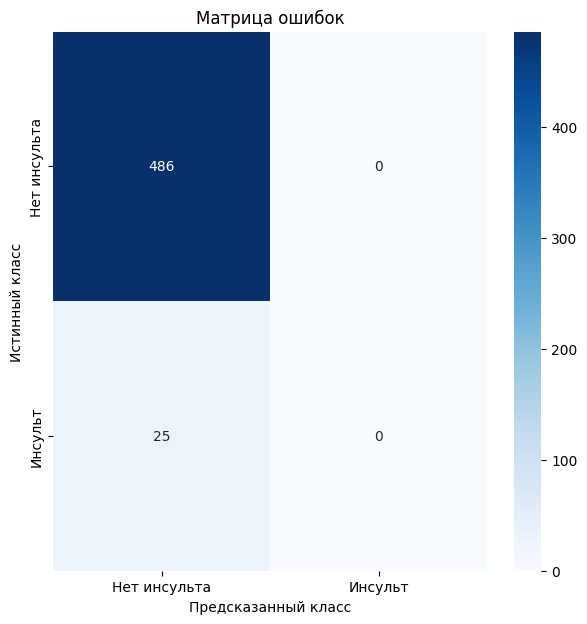

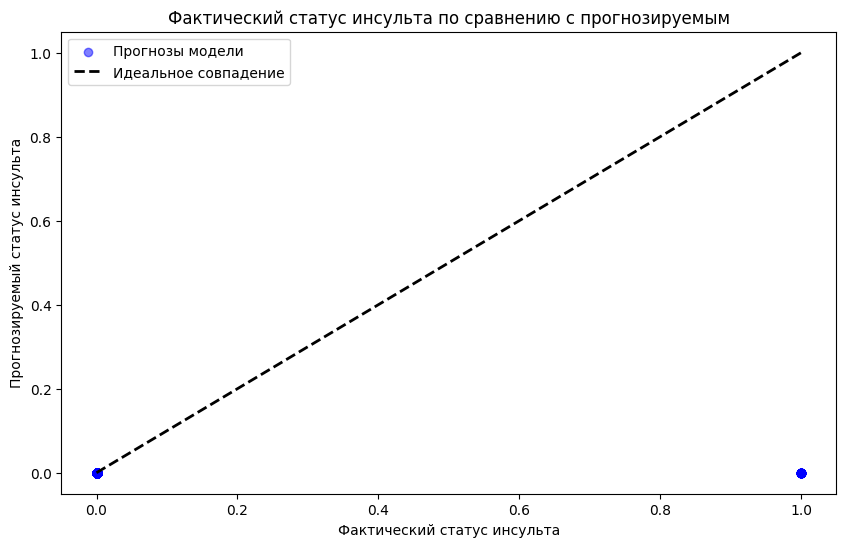

In [174]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['id', 'stroke'])  # Признаки
y = data['stroke']  # Целевая переменная

# Преобразование категориальных признаков с помощью One-Hot Encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Заполнение пропущенных значений (например, медианой для числовых данных)
X.fillna(X.median(), inplace=True)

# Разделение данных на обучающую и тестовую выборки
# Обучающая выборка
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Тестовая и контрольная выборки
X_test, X_control, y_test, y_control = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Обучение модели
model = RandomForestClassifier(random_state=42)

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC

# Метрики
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'ROC-AUC: {roc_auc:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Матрица ошибок:')
print(conf_matrix)
print('Отчет по классификации:')
print(class_report)

# Визуализация матрицы ошибок
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Нет инсульта', 'Инсульт'], yticklabels=['Нет инсульта', 'Инсульт'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Прогнозы модели')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Идеальное совпадение')
plt.xlabel('Фактический статус инсульта')
plt.ylabel('Прогнозируемый статус инсульта')
plt.title('Фактический статус инсульта по сравнению с прогнозируемым')
plt.legend()
plt.show()



<p style="margin: 30px;">в общем, вышло так, что пока что моя модель может предсказать ОТСУТСТВИЕ инсульта с высокой точностью, но вообще не может предсказать его наличие... целей пока не достигаем, задачи не решаем(</p>